# Corporate Credit Rating Forecasting 



### Introduction

This notebook contains the results of the data analysis performed on a set of corporate credit ratings given by ratings agencies to a set of companies. The aim of the data analysis is to build a machine learning model from the rating data that can be used to predict the rating a company will receive.

The first section section of the notebook shows the exploratory data analysis (EDA) performed to explore and understand the data. It looks at each attribute (variable) in the data to understand the nature and distribution of the attribute values. It also examines the correlation between the variables through visual analysis. A summary at the end highlights the key findings of the EDA.

The second section shows the development of a machine learning model. It details the process used to build the model and shows the model at key points in the development process. The final model is then presented along with an analysis and interpretation of the model. This section concludes with the results of using the model to predict house prices for the data in the development dataset.

The final section provides the details of the model to enable it to be rebuilt. In addition to the model itself, it includes the functions used to transform the data and run the model.

Two datasets were provided for the assignment - training.csv and dev.csv. The exploratory data analysis and the model building were done using the training.csv dataset; the dev.csv dataset was only used to test the generated model

### The Dataset

There are xxxx features for every company. They can be divided in: <br>
- **Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, daysOfInventoryOutstanding, operatingCycle, daysOfPayablesOutstanding, cashConversionCycle
- **Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, netIncomePerEBT, ebtPerEbit, ebitPerRevenue
- **Debt Ratios**: debtRatio, debtEquityRatio, longTermDebtToCapitalization, totalDebtToCapitalization, interestCoverage, cashFlowToDebtRatio, companyEquityMultiplier
- **Operating Performance Ratios**: receivablesTurnover, payablesTurnover, inventoryTurnover, fixedAssetTurnover, assetTurnover
- **Cash Flow Indicator Ratios**: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, payoutRatio, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio, cashFlowCoverageRatios, shortTermCoverageRatios, capitalExpenditureCoverageRatio, dividendPaidAndCapexCoverageRatio, dividendPayoutRatio, 


### Libraries used:
- pandas
- numpy
- matplotlib
- seaborn
- random
- sklearn

Load the Libraries used in the notebook

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from random import sample 
import seaborn as sns
import xgboost as xgb
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

#### Ignore Warnings

In [204]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### Import Dataset

In [205]:
df_rating = pd.read_csv('data/corporate_rating.csv')

## Exploratory Data Analysis

Our first step is to perform an exploratory data analysis to understand the charateristics of dataset. Here are some quesitons we will try to adress:

- What are the dimensions of the data?
- How do predictors relate to each other?
- What are the classes of the data?
- How are the predictors distributed?
- How are the labels distributed?
- Do we have missing values?
- Are outliers are relevant?
- Are there any transformations that must be done with the dataset?

In [206]:
# Display the dimensions
print("The credit rating dataset has", df_rating.shape[0], "records, each with", df_rating.shape[1],
    "attributes")

The credit rating dataset has 2029 records, each with 31 attributes


We will now use the function `.info()` to see the classes of columns and search missing values.  

In [207]:
# Display the structure
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
Rating                                2029 non-null object
Name                                  2029 non-null object
Symbol                                2029 non-null object
Rating Agency Name                    2029 non-null object
Date                                  2029 non-null object
Sector                                2029 non-null object
currentRatio                          2029 non-null float64
quickRatio                            2029 non-null float64
cashRatio                             2029 non-null float64
daysOfSalesOutstanding                2029 non-null float64
netProfitMargin                       2029 non-null float64
pretaxProfitMargin                    2029 non-null float64
grossProfitMargin                     2029 non-null float64
operatingProfitMargin                 2029 non-null float64
returnOnAssets                        2029 non-null float64

We have 26 columns of numerical data and 6 descriptive columns (one of which is the label).There are no missing values.
<br> A first look at the data:

In [208]:
df_rating.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,whirlpool,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,whirlpool,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,whirlpool,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,whirlpool,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,whirlpool,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


### Analyse Labels

As we know we are working with ordinal labels. That means there is a scale from more secure to less secure ratings. For instance, the triple-A (AAA) is the most secure rating a company can receive. On the other hand, the rating D is the less secure. It means the company will likely default on its creditors. Let's have a first look at the how many reatings we have of each in the dataset. 


In [209]:
df_rating.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

We observe that the dataset is very unbalanced. We have 671 triple-Bs (BBB) but only 1 D. However, we are working with Ratings from different companies such as `Moody's`, `Standard & Poor's` and more. Therefore it is preferred to simplify the labels according to this table from the website [investopedia](https://www.investopedia.com/terms/c/corporate-credit-rating.asp). We will classify our labels according to the grading risk and not the rate. 

| Bond Rating |                   |          |            |              |
|-------------|-------------------|----------|------------|--------------|
| Moody's     | Standard & Poor's | Fitch    | Grade      | Risk         |
| Aaa         | AAA               | AAA      | Investment | Lowest Risk  |
| Aa          | AA                | AA       | Investment | Low Risk     |
| A           | A                 | A        | Investment | Low Risk     |
| Baa         | BBB               | BBB      | Investment | Medium Risk  |
| Ba, B       | BB, B             | BB, B    | Junk       | High Risk    |
| Caa/Ca      | CCC/CC/C          | CCC/CC/C | Junk       | Highest Risk |
| C           | D                 | D        | Junk       | In Default   |


To do it we will replace with a dictonary each of this ratings. 

In [210]:
rating_dict = {'AAA':'Lowest Risk', 
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk', 
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk', 
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

df_rating.Rating = df_rating.Rating.map(rating_dict)

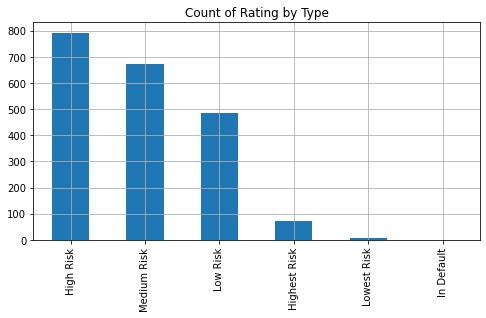

In [211]:
ax = df_rating['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True)

Unfortunately, given the lack of Credit Ratings classified as `Lowest Risk` and `In Default` we will have to eliminate then from the table. However, the dataset will keep unbalanced and if needed we will have to adress this issue in further steps. 

In [212]:
df_rating = df_rating[df_rating['Rating']!='Lowest Risk'] # filter Lowest Risk
df_rating = df_rating[df_rating['Rating']!='In Default']  # filter In Default
df_rating.reset_index(inplace = True, drop=True) # reset index

### Descriptive Statistics

Now we will use statistical tools, especially from pandas to improve the understanding from the dataset, especially the numerical features. We have seen there are 25 numerical columns in the dataset, all of each are financial indicators from the companies. The function `describe()` returns information about the distribution of the data such as `quantiles`, `min` and `max`.

In [213]:
# Statistical summary 
df_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2.021000e+03,2021.000000,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.400755,0.408272,5.114871e+03,4.244248e+03,3.335166,0.438715,48.426558,6.540891e+03,1.452142,38.138233
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,10.613711,3.803929,1.472059e+05,1.226418e+05,87.702375,9.002047,530.161001,1.778797e+05,19.521704,760.421855
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611016,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.147837,0.269616,4.094118e-01,1.562116e+00,2.050249,0.028057,6.235759,2.348851e+00,0.073664,2.202394
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.300439,0.644265,2.123062e+00,3.680425e+00,2.657275,0.087424,9.269746,4.361649e+00,0.132758,5.775840
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.370239,0.836949,4.230253e+00,8.027524e+00,3.665438,0.149355,12.898855,7.322553e+00,0.239359,9.500424
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


### Skewness and Outliers

We observe a lot of skewness in the data with this first exploration. In this case, it means that most variables in the dataset may strong presence of outliers. Taking as observation the table above the first column:

- `currentRatio`: This 50% of its variables between `1.071` and `2.166891`. The minimum value is `-0.932005` however the maximum value is `1725.505005`. It means, in other words, there is a giant outlier that is extremely distant from most points from the data (currentRatio). 

The same pattern can be observed in the following columns such as `quickRatio`,	`cashRatio`, `daysOfSalesOutstanding`, `netProfitMargin` and so on.

To observe how this reflect on the distribution of the data lets make some plots of variables chose randomly.

In [214]:
column_list = list(df_rating.columns[6:31])
column_list = sample(column_list,4) 
print(column_list)

['freeCashFlowPerShare', 'ebitPerRevenue', 'effectiveTaxRate', 'enterpriseValueMultiple']


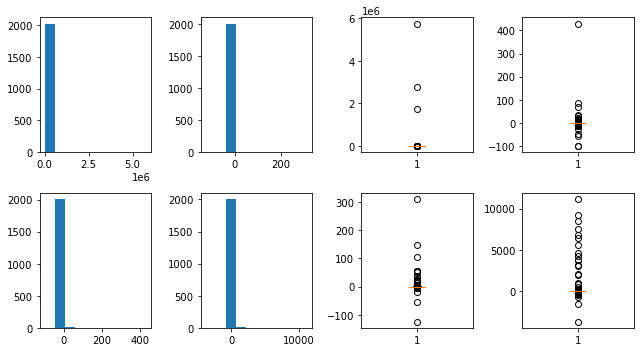

In [215]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df_rating[column_list[0]])
axes[0, 1].hist(df_rating[column_list[1]])
axes[1, 0].hist(df_rating[column_list[2]])
axes[1, 1].hist(df_rating[column_list[3]])

axes[0, 2].boxplot(df_rating[column_list[0]])
axes[1, 2].boxplot(df_rating[column_list[1]])
axes[0, 3].boxplot(df_rating[column_list[2]])
axes[1, 3].boxplot(df_rating[column_list[3]])

figure.tight_layout()

As predicted, the data is comtaminated by outliers. We canot observe real behaviour of the distribution because some points differ too much from the others. We will use the function `.skew` from pandas in all columns. It should return between 0 and 1 if a column is normally distributed. 

In [216]:
df_rating.skew(axis=0)

currentRatio                          34.271115
quickRatio                            30.864610
cashRatio                             27.046952
daysOfSalesOutstanding                20.359098
netProfitMargin                       17.585073
pretaxProfitMargin                    22.052558
grossProfitMargin                    -14.198688
operatingProfitMargin                 26.441502
returnOnAssets                       -32.049111
returnOnCapitalEmployed              -33.252701
returnOnEquity                        31.639845
assetTurnover                         25.968848
fixedAssetTurnover                    26.068762
debtEquityRatio                        0.268074
debtRatio                              1.284256
effectiveTaxRate                      32.265705
freeCashFlowOperatingCashFlowRatio   -22.868222
freeCashFlowPerShare                  33.610677
cashPerShare                          33.958646
companyEquityMultiplier                0.268175
ebitPerRevenue                        22

We observe this is a generalized problem. As we can see almost all columns are extremely skewed. We will now go deeper in the investigation of outliers. The following code will return the proportion of outliers in each column . The definition of outlier will be the one from the boxplot - above or bellow `1.5 x IQR`.

In [217]:
for c in df_rating.columns[6:31]:

    q1 = df_rating[c].quantile(0.25)
    q3 = df_rating[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(df_rating.loc[(df_rating[c] < fence_low)  ,c])
    upper_out = len(df_rating.loc[(df_rating[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(df_rating)
    print(c, ": "+"{:.2%}".format(prop_out))


currentRatio : 18.01%
quickRatio : 19.05%
cashRatio : 14.84%
daysOfSalesOutstanding : 23.55%
netProfitMargin : 25.09%
pretaxProfitMargin : 24.49%
grossProfitMargin : 0.99%
operatingProfitMargin : 22.12%
returnOnAssets : 24.25%
returnOnCapitalEmployed : 22.07%
returnOnEquity : 28.70%
assetTurnover : 15.83%
fixedAssetTurnover : 13.46%
debtEquityRatio : 22.07%
debtRatio : 21.33%
effectiveTaxRate : 28.06%
freeCashFlowOperatingCashFlowRatio : 16.92%
freeCashFlowPerShare : 23.55%
cashPerShare : 17.12%
companyEquityMultiplier : 22.02%
ebitPerRevenue : 24.34%
enterpriseValueMultiple : 23.70%
operatingCashFlowPerShare : 17.66%
operatingCashFlowSalesRatio : 16.87%
payablesTurnover : 14.45%


Most columns have a significant number of outliers. However it is not clear for us if there are a few rows that all outliers or each of the rows may be contributing individually with some outliers. We will now check by row the distribution of outliers. We will create a new dataframe that `df_rating_outlier` that will be used with this purpose. In this dataframe every cell will 1 one if the corresponding cell is an outlier in `df_raint` and 0 if it is not.

In [218]:
df_rating_outlier = df_rating.copy()

for c in df_rating_outlier.columns[6:31]:
    
    q1 = df_rating_outlier[c].quantile(0.25)
    q3 = df_rating_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    
    for i in range(len(df_rating_outlier)):
        
        if df_rating.loc[i,c] < fence_low or df_rating.loc[i,c] > fence_high: # if Outlier
            
            df_rating_outlier.loc[i,c] = 1
        
        else: # Not Outlier
            df_rating_outlier.loc[i,c] = 0

In [219]:
df_rating_outlier.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,Low Risk,whirlpool,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Medium Risk,whirlpool,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Medium Risk,whirlpool,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Medium Risk,whirlpool,WHR,Fitch Ratings,6/15/2012,Consumer Durables,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Medium Risk,whirlpool,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Now we will be able to count how many outliers each row has and plot it. 

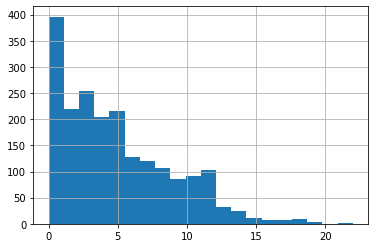

In [220]:
df_rating_outlier["total"] = df_rating_outlier.sum(axis=1)
df_rating_outlier.total.hist(bins = 20)

This is a very interesting plot. We can see that only up to 400 rows don't have any outliers. Most rows have outliers and maybe they will be useful in the further classification tasks. Therefore we see no value in excluding the outliers from the dataset. However we will perform a transformation on the data so we can reduce its negative impact.

#### Data reshaping

We will now perform the following steps in each of the numerical data. 
1. Normalize the data between 0 and 1 (and multiply by 1.000).
2. Apply log on base 10 on each of the variables. 

In [221]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

for c in df_rating.columns[6:31]:

    df_rating[[c]] = min_max_scaler.fit_transform(df_rating[[c]].to_numpy())*1000
    df_rating[[c]] = df_rating[c].apply(lambda x: np.log10(x+0.01))

### Again the plots

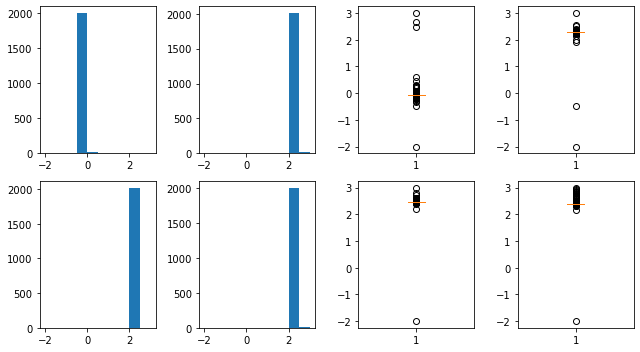

In [222]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df_rating[column_list[0]])
axes[0, 1].hist(df_rating[column_list[1]])
axes[1, 0].hist(df_rating[column_list[2]])
axes[1, 1].hist(df_rating[column_list[3]])

axes[0, 2].boxplot(df_rating[column_list[0]])
axes[1, 2].boxplot(df_rating[column_list[1]])
axes[0, 3].boxplot(df_rating[column_list[2]])
axes[1, 3].boxplot(df_rating[column_list[3]])

figure.tight_layout()

We have a problem with respect to vizualisation of the data. The impact of the outliers is so big that we cannot observe the patterns in the data. To enhance our visualization we will from now ignore outliers. We will replace then by values with lower impact such as the lower hinge. In this way we will be able to continue with our EDA. To preserve our dataset we will use a new table called `df_rating_no_out`.

In [223]:
df_rating_no_out = df_rating.copy()

for c in df_rating_no_out.columns[6:31]:

    q05 = df_rating_no_out[c].quantile(0.10)
    q95 = df_rating_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    df_rating_no_out.loc[df_rating_no_out[c] > fence_high,c] = df_rating_no_out[c].quantile(0.25)
    df_rating_no_out.loc[df_rating_no_out[c] < fence_low,c] = df_rating_no_out[c].quantile(0.75)
    

Now that we have this dataframe we can use it use it to observe the data from a different angle. We will be able to observe the distribution that was hidden by the outliers. The first step:
   - Plot all columns (boxplot) by each label:`High Risk`, `Low Risk`, `Medium Risk`, `Highest Risk`.

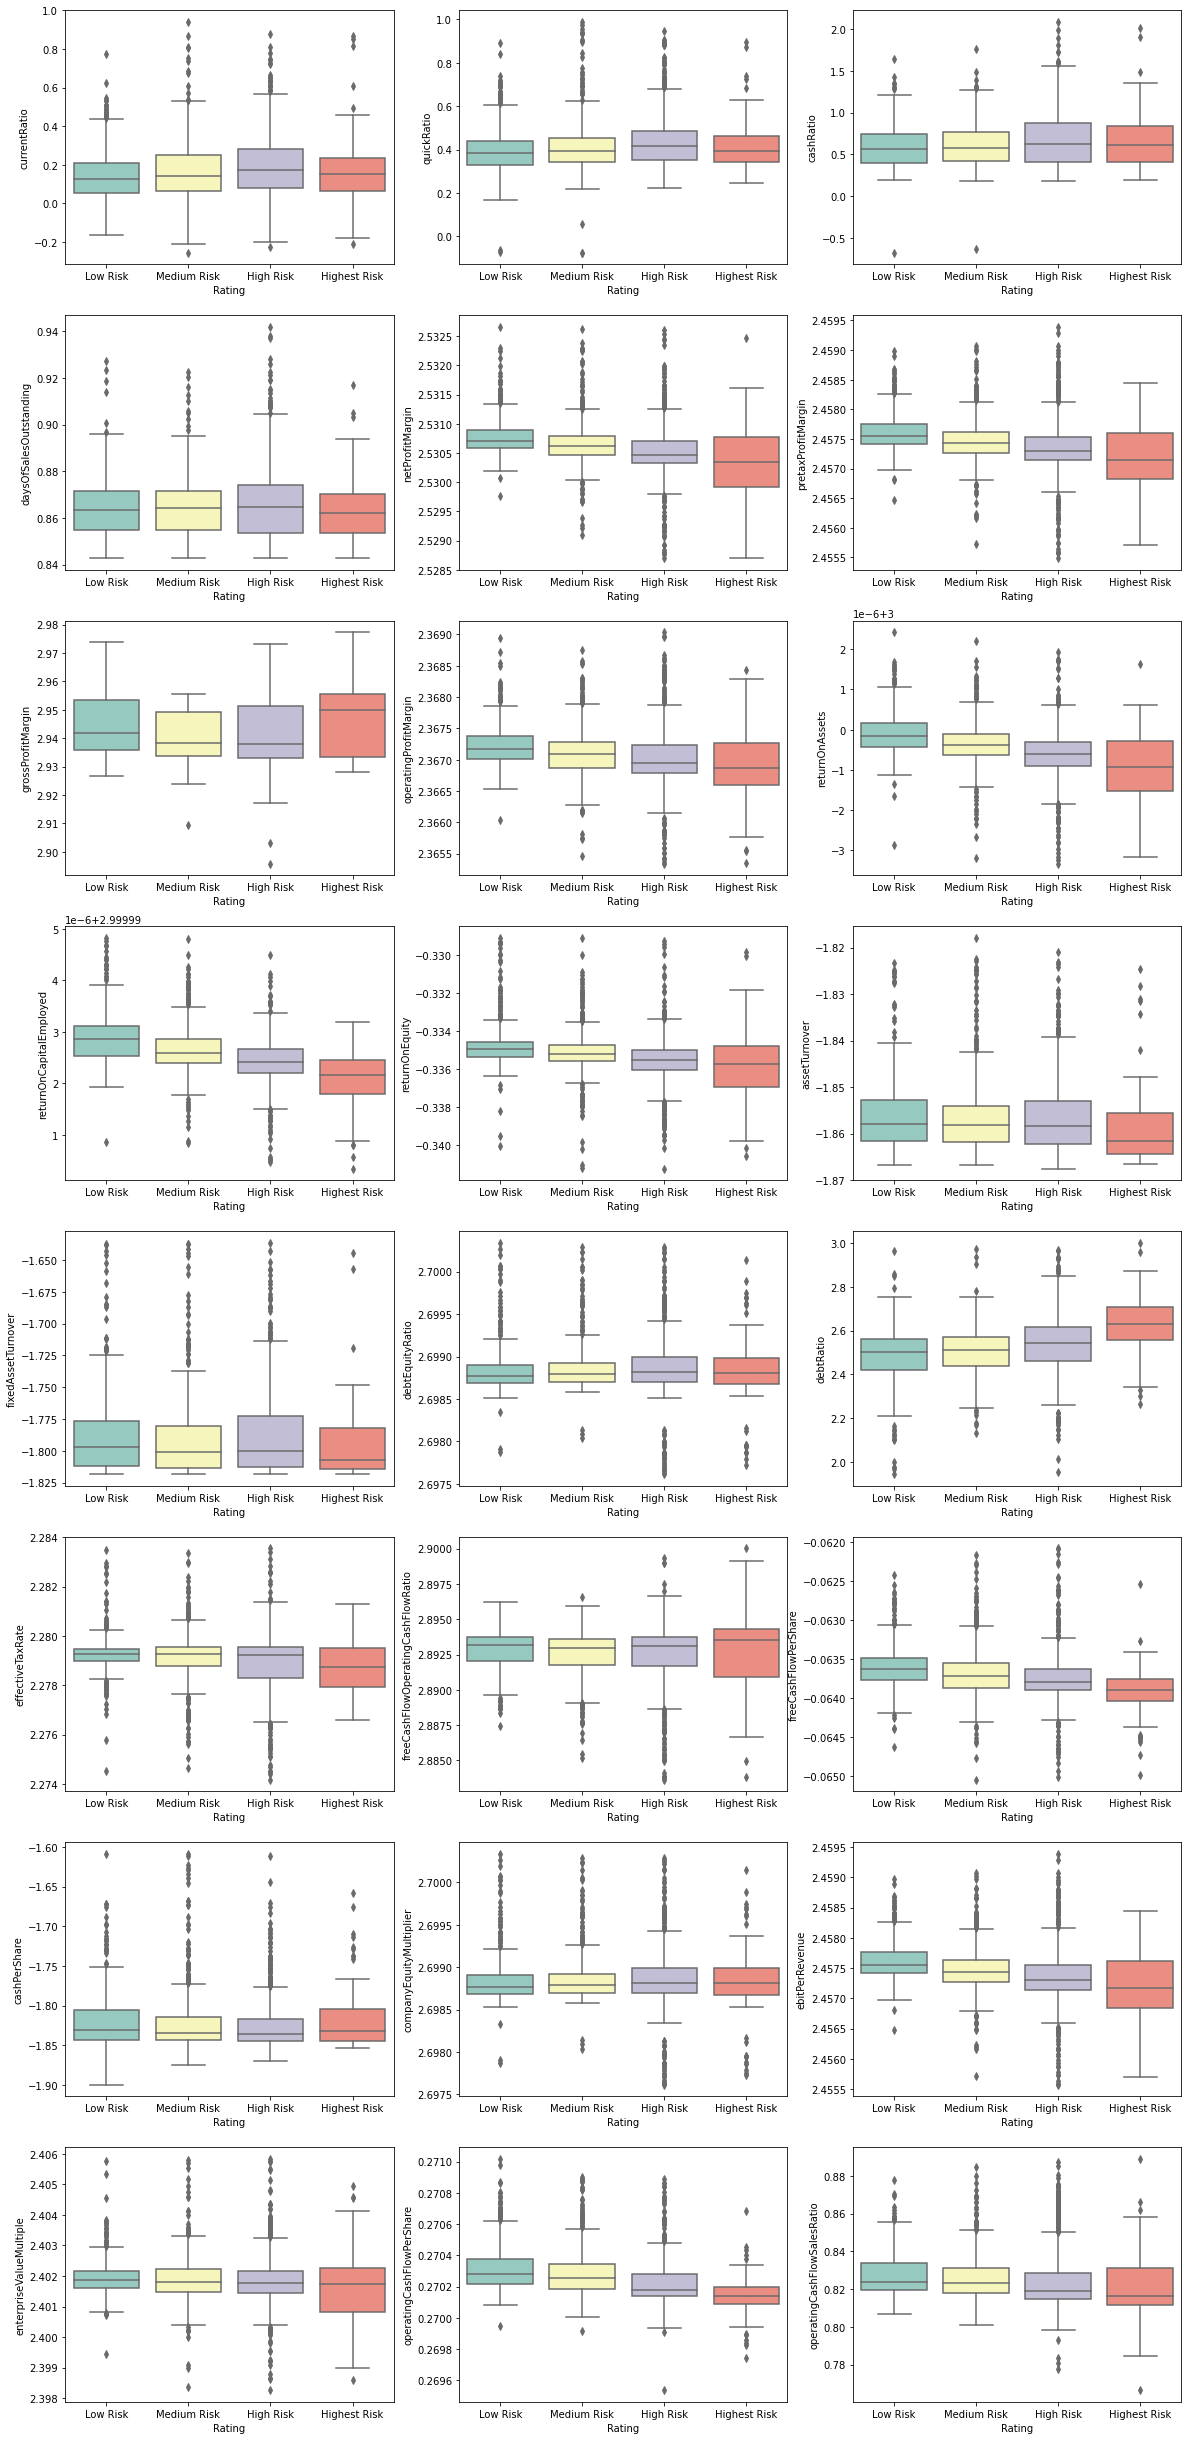

In [224]:
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0 
j = 0

for c in df_rating_no_out.columns[6:30]:
    
    sns.boxplot(x=df_rating_no_out.Rating, y=df_rating_no_out[c], palette="Set3", ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1    


The most interesting point about the previous plots is the fact that they clearly show a difference in the medians and distribution according to the rating (Risk). It points to a scenario where the variables will have good predictive power for classification. Following with our analysis we will create scatter plots to see if we can observe who the variables relate to each other and how labels can be observer in respect to it.

In [225]:
df_rating.colors = 'a'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Lowest Risk', 'color'] = 'r'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Low Risk', 'color'] = 'g'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Medium Risk', 'color'] = 'b'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'High Risk','color'] = 'y'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Highest Risk', 'color'] = 'm'

In [226]:
column_list = list(df_rating.columns[6:31])
column_list = sample(column_list,12) 

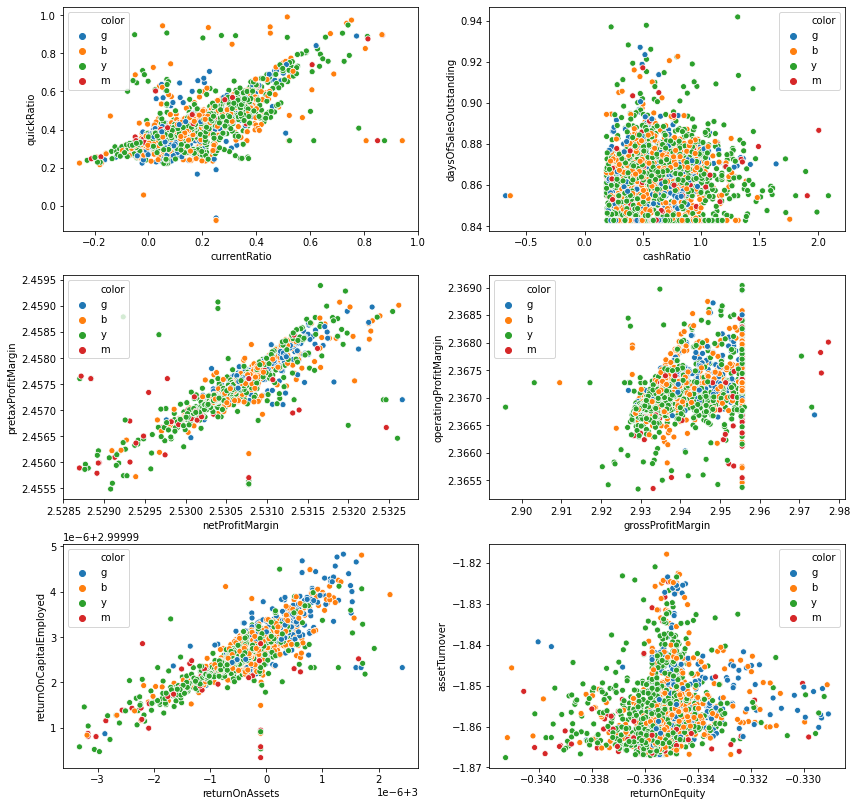

In [232]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))

i = 0 
j = 0

for c in range(0,12, 2):

    sns.scatterplot(x = column_list[c], y=column_list[c+1], hue="color", data=df_rating_no_out, ax=axes[j,i])
    
    if i == 1:
        i = 0
        j +=1
    
    else:
        i+=1

In fact, we are working with a dataset that has a big numer of dimensions. With two variables it would not be possible to make any predictions. However this is not the case. Unfortunately we are not able to vizualise the data in all its dimensions, but luckely we will be able to perform accurate classificaitons. 

# Machine Learning 

## Prepare the Dataset

In [163]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_rating.Sector)
df_rating.Sector = le.transform(df_rating.Sector)
le.fit(df_rating.Rating)
df_rating.Rating = le.transform(df_rating.Rating)

In [164]:
df_train, df_test = train_test_split(df_rating, test_size=0.2, random_state = 1234)

In [165]:
X_train, y_train = df_train.iloc[:,5:31], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,5:31], df_test.iloc[:,0]

# Fit Models

#### XGBOOST


In [166]:
XGB_model = xgb.XGBRegressor(objective ='multi:softmax', num_class =4)
XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy:",Accuracy_XGB)

XGB Accuracy: 0.691358024691358


#### Gradient Boosting Classifier

In [167]:
GBT_model = GradientBoostingClassifier(random_state=1234)
GBT_model.fit(X_train, y_train)
y_pred_GBT = GBT_model.predict(X_test)
Accuracy_GBT = metrics.accuracy_score(y_test, y_pred_GBT)
print("GBT Accuracy:",Accuracy_GBT)

GBT Accuracy: 0.6320987654320988


#### Random Forest


In [168]:
RF_model = RandomForestClassifier(random_state=1234)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.6246913580246913


#### Support Vector Machine


In [169]:
SVC_model = svm.SVC(kernel='rbf', gamma= 2, C = 5, random_state=1234)
SVC_model.fit(X_train, y_train)
y_pred_SVM = SVC_model.predict(X_test)
Accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
print("SVM Accuracy:",Accuracy_SVM)

SVM Accuracy: 0.5333333333333333


#### Neural Network

In [170]:
MLP_model = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=1500)
MLP_model.fit(X_train, y_train)
y_pred_MLP = MLP_model.predict(X_test)
Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
print("MLP Accuracy:",Accuracy_MLP)

MLP Accuracy: 0.3654320987654321


#### Naive Bayes

In [171]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
y_pred_GNB = GNB_model.predict(X_test)
Accuracy_GNB = metrics.accuracy_score(y_test, y_pred_GNB)
print("GNB Accuracy:",Accuracy_GNB)

GNB Accuracy: 0.30864197530864196


#### Linear Discriminant Analysis

In [172]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
Accuracy_LDA = metrics.accuracy_score(y_test, y_pred_LDA)
print("LDA Accuracy:",Accuracy_LDA)

LDA Accuracy: 0.38765432098765434


#### Quadratic Discriminant Analysis

In [173]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train,y_train)
y_pred_QDA = QDA_model.predict(X_test)
Accuracy_QDA = metrics.accuracy_score(y_test, y_pred_QDA)
print("QDA Accuracy:",Accuracy_QDA)

QDA Accuracy: 0.35555555555555557


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### K Nearest Neighbours


In [174]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
print("KNN Accuracy:",Accuracy_KNN)

KNN Accuracy: 0.5802469135802469


#### Logistic Regression


In [175]:
LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.3925925925925926


### Analyse Results

In [176]:
accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_SVM, Accuracy_MLP, Accuracy_GNB, 
                 Accuracy_LDA, Accuracy_QDA, Accuracy_KNN, Accuracy_LR]

model_list = ['XGBOOST', 'Gradient Boosting', 'Random Forest', 'Support Vector Machine', 
              "Neural Network", 'Naive Bayes', 'Linear Discriminat', 'Quadratic Discriminat', 
              'KNN', 'Logistic Regression']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

In [177]:
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

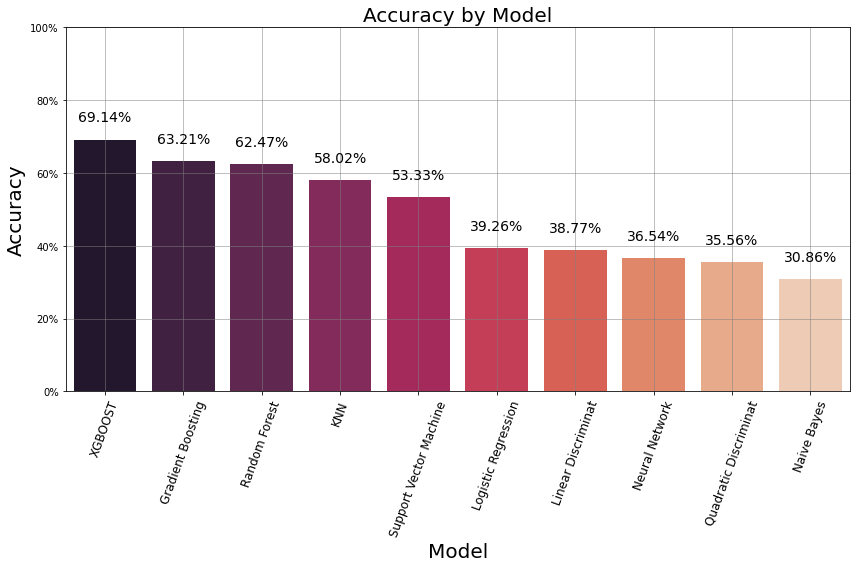

In [178]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick


plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


In [153]:
cm = confusion_matrix(y_test, y_pred_XGB)

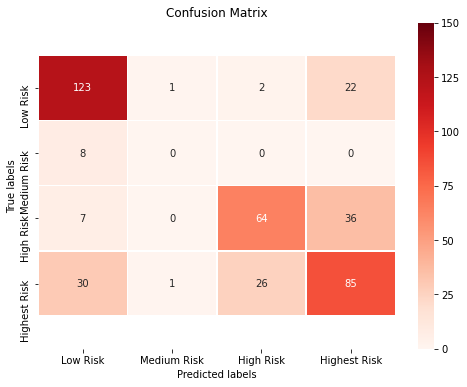

In [154]:
fig_dims = (8,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(cm, annot=True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Reds"); # annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Low Risk', 'Medium Risk', 'High Risk', 'Highest Risk']); ax.yaxis.set_ticklabels(['Low Risk', 'Medium Risk', 'High Risk', 'Highest Risk']);
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

## XGBOOST Hyperparameter Tunning

Best: 0.659653 using {'n_estimators': 50}
0.659653 (0.037624) with: {'n_estimators': 50}
0.655322 (0.042196) with: {'n_estimators': 100}
0.649134 (0.041739) with: {'n_estimators': 150}
0.656559 (0.037951) with: {'n_estimators': 200}
0.652847 (0.039307) with: {'n_estimators': 250}
0.652228 (0.042253) with: {'n_estimators': 300}
0.652228 (0.041533) with: {'n_estimators': 350}


Text(0, 0.5, 'Log Loss')

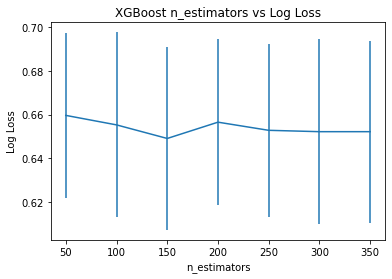

In [81]:
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGB_model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

range(1, 11, 2)
Best: 0.665842 using {'max_depth': 7}
0.564975 (0.034362) with: {'max_depth': 1}
0.631188 (0.029479) with: {'max_depth': 3}
0.660272 (0.043100) with: {'max_depth': 5}
0.665842 (0.040724) with: {'max_depth': 7}
0.665223 (0.036047) with: {'max_depth': 9}


Text(0, 0.5, 'Log Loss')

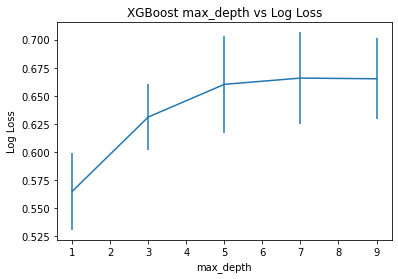

In [82]:
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGB_model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Best: 0.655322 using {'gamma': 0.0}
0.655322 (0.042196) with: {'gamma': 0.0}
0.655322 (0.029212) with: {'gamma': 0.1}
0.649752 (0.027655) with: {'gamma': 0.2}
0.645421 (0.035729) with: {'gamma': 0.3}
0.644802 (0.037960) with: {'gamma': 0.4}
0.639233 (0.034396) with: {'gamma': 0.5}
0.629950 (0.029034) with: {'gamma': 0.6}
0.644183 (0.031842) with: {'gamma': 0.7}
0.639233 (0.036090) with: {'gamma': 0.8}
0.642327 (0.035988) with: {'gamma': 0.9}
0.632426 (0.022200) with: {'gamma': 1.0}


Text(0, 0.5, 'Log Loss')

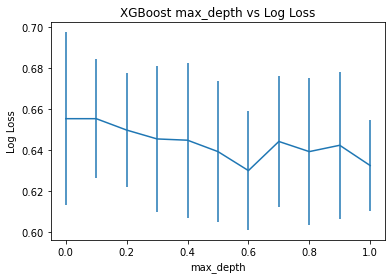

In [83]:
gamma = [i/10. for i in range(0,11)]
print(gamma)
param_grid = dict(gamma=gamma)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGB_model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(gamma, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')

In [84]:
# subsample = [i/10. for i in range(1,11)]
# colsample_bytree = [i/10. for i in range(1,11)]

# print(subsample)
# print(colsample_bytree)

# param_grid = dict(subsample=subsample, colsample_bytree = colsample_bytree)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(XGB_model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plt.errorbar(subsample, means, yerr=stds)
# plt.title("XGBoost max_depth vs Log Loss")
# plt.xlabel('max_depth')
# plt.ylabel('Log Loss')

0.655322 (0.042196) with: {'gamma': 0.0}
0.655322 (0.029212) with: {'gamma': 0.1}
0.649752 (0.027655) with: {'gamma': 0.2}
0.645421 (0.035729) with: {'gamma': 0.3}
0.644802 (0.037960) with: {'gamma': 0.4}
0.639233 (0.034396) with: {'gamma': 0.5}
0.629950 (0.029034) with: {'gamma': 0.6}
0.644183 (0.031842) with: {'gamma': 0.7}
0.639233 (0.036090) with: {'gamma': 0.8}
0.642327 (0.035988) with: {'gamma': 0.9}
0.632426 (0.022200) with: {'gamma': 1.0}


0.589109 (0.021585) with: {'max_depth': 2, 'n_estimators': 50}
0.594609 (0.031956) with: {'max_depth': 2, 'n_estimators': 100}
0.602860 (0.041249) with: {'max_depth': 2, 'n_estimators': 150}
0.610011 (0.043826) with: {'max_depth': 2, 'n_estimators': 200}
0.642464 (0.031361) with: {'max_depth': 4, 'n_estimators': 50}
0.665567 (0.034620) with: {'max_depth': 4, 'n_estimators': 100}
0.664466 (0.030367) with: {'max_depth': 4, 'n_estimators': 150}
0.666667 (0.024235) with: {'max_depth': 4, 'n_estimators': 200}
0.670517 (0.034088) with: {'max_depth': 6, 'n_estimators': 50}
0.677668 (0.032426) with: {'max_depth': 6, 'n_estimators': 100}
0.683168 (0.039959) with: {'max_depth': 6, 'n_estimators': 150}
0.682068 (0.039497) with: {'max_depth': 6, 'n_estimators': 200}
0.674917 (0.032084) with: {'max_depth': 8, 'n_estimators': 50}
0.684268 (0.033519) with: {'max_depth': 8, 'n_estimators': 100}
0.682068 (0.033914) with: {'max_depth': 8, 'n_estimators': 150}
0.683168 (0.034450) with: {'max_depth': 8, '

Text(0, 0.5, 'Log Loss')

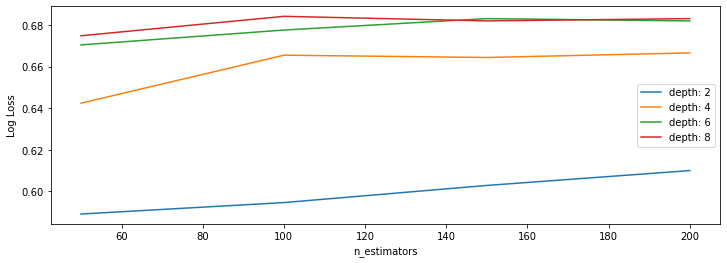

In [2248]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGB_model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

In [2249]:
params = XGB_model.get_xgb_params()
params

{'objective': 'multi:softmax',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'num_class': 4}

In [79]:
xg_reg = xgb.XGBRegressor(max_depth = 8, n_estimators = 150, num_class =  4, objective = 'multi:softmax', colsample_bytree = 1, subsample = 1.0)

xg_reg.fit(X_train, y_train)
y_pred_XGB = xg_reg.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy:",Accuracy_XGB)

XGB Accuracy: 0.6864197530864198


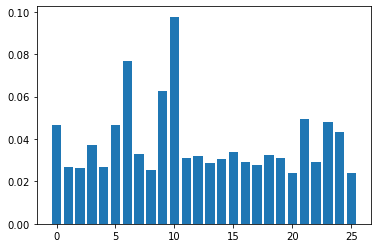

In [80]:
plt.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
plt.show()

In [2298]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# fit model on all training data
# model = XGBClassifier()
# model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = xg_reg.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 67.98%
Thresh=0.025, n=26, Accuracy: 65.52%
Thresh=0.026, n=25, Accuracy: 64.04%
Thresh=0.027, n=24, Accuracy: 63.55%
Thresh=0.028, n=23, Accuracy: 64.53%
Thresh=0.029, n=22, Accuracy: 62.56%
Thresh=0.029, n=21, Accuracy: 62.07%
Thresh=0.030, n=20, Accuracy: 63.55%
Thresh=0.031, n=19, Accuracy: 64.04%
Thresh=0.032, n=18, Accuracy: 63.55%
Thresh=0.032, n=17, Accuracy: 65.52%
Thresh=0.032, n=16, Accuracy: 64.04%
Thresh=0.033, n=15, Accuracy: 64.53%
Thresh=0.034, n=14, Accuracy: 64.53%
Thresh=0.035, n=13, Accuracy: 63.55%
Thresh=0.036, n=12, Accuracy: 63.55%
Thresh=0.036, n=11, Accuracy: 59.61%
Thresh=0.036, n=10, Accuracy: 59.61%
Thresh=0.038, n=9, Accuracy: 55.67%
Thresh=0.040, n=8, Accuracy: 53.69%
Thresh=0.040, n=7, Accuracy: 55.67%
Thresh=0.042, n=6, Accuracy: 49.26%
Thresh=0.053, n=5, Accuracy: 48.28%
Thresh=0.055, n=4, Accuracy: 49.75%
Thresh=0.057, n=3, Accuracy: 52.22%
Thresh=0.071, n=2, Accuracy: 49.75%
Thresh=0.073, n=1, Accuracy: 41.38%


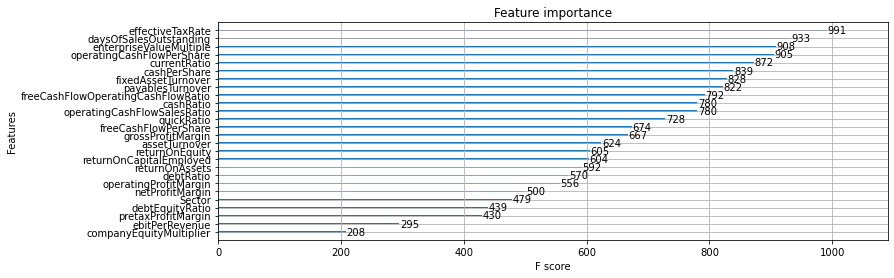

In [2300]:
from xgboost import plot_importance

plot_importance(xg_reg)
plt.show()